# Data Analysis and Preprocessing

In [ ]:
#for local and new IDE only
pip install scikit-learn
pip install seaborn
pip install numpy
pip install pandas
pip install matplotlib

In [61]:
#library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [62]:
#Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/MyDrive'

In [64]:
import pandas as pd

# Replace 'filename.csv' with your actual file name
churn_data = '/content/drive/MyDrive/Churn_Modelling.csv'
churn = pd.read_csv(churn_data)


In [65]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
churn.shape

(10000, 14)

In [67]:
churn.size

140000

In [68]:
churn.columns=churn.columns.str.strip()

In [69]:
#Set all column names into lowercase
churn.columns=churn.columns.str.lower()

In [70]:
#Check any missing data
churn.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [71]:
#Remove duplicate value for customerid
churn[churn.duplicated(subset=['customerid'],keep=False)]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited


In [72]:
#Row Number, CustomerID, Surname, Geography and Gender is dropped as not really relevant to churn prediction
churn.drop(columns = ['rownumber','customerid','surname', 'geography', 'gender'], inplace= True )

In [73]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   age              10000 non-null  int64  
 2   tenure           10000 non-null  int64  
 3   balance          10000 non-null  float64
 4   numofproducts    10000 non-null  int64  
 5   hascrcard        10000 non-null  int64  
 6   isactivemember   10000 non-null  int64  
 7   estimatedsalary  10000 non-null  float64
 8   exited           10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.2 KB


In [74]:
churn.describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [76]:
#Check whether exited value column is balanced
churn['exited'].value_counts().to_frame()

,exited
0,7963
1,2037


In [77]:
#import resample library to balance the exited value
from sklearn.utils import resample

In [78]:
churn_majority=churn[churn['exited']==0]
churn_minority=churn[churn['exited']==1]

In [80]:
#balanced out churn exited == 0 and exited ==1 count
churn_majority_downsample=resample(churn_majority,n_samples=2037,replace=False,random_state=42)

In [81]:
#concatinate the churn value back into dataset
churn=pd.concat([churn_majority_downsample,churn_minority])

In [82]:
churn['exited'].value_counts().to_frame()

,exited
0,2037
1,2037


In [83]:
churn.corr()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
creditscore,1.000000,-0.019635,0.019156,0.022088,0.007916,0.002756,0.012992,-0.010973,-0.034660
age,-0.019635,1.000000,-0.029303,0.040785,-0.031884,-0.031115,0.016498,0.006669,0.343870
tenure,0.019156,-0.029303,1.000000,0.006340,0.019054,0.018600,-0.032413,0.025749,-0.016491
balance,0.022088,0.040785,0.006340,1.000000,-0.189561,-0.008388,-0.025617,0.001774,0.146820
numofproducts,0.007916,-0.031884,0.019054,-0.189561,1.000000,-0.008130,0.037570,0.008241,-0.054669
hascrcard,0.002756,-0.031115,0.018600,-0.008388,-0.008130,1.000000,-0.031892,-0.024178,-0.017800
isactivemember,0.012992,0.016498,-0.032413,-0.025617,0.037570,-0.031892,1.000000,-0.007396,-0.201877
estimatedsalary,-0.010973,0.006669,0.025749,0.001774,0.008241,-0.024178,-0.007396,1.000000,0.006173
exited,-0.034660,0.343870,-0.016491,0.146820,-0.054669,-0.017800,-0.201877,0.006173,1.000000


<Axes: >

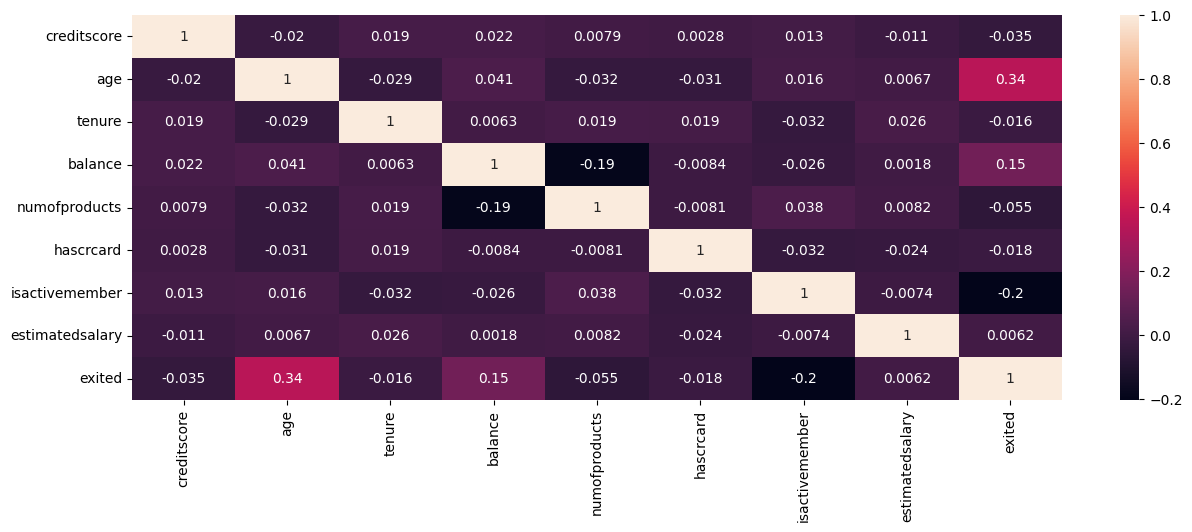

In [84]:
plt.figure(figsize=(15,5))
sns.heatmap(churn.corr(),annot=True)

In [85]:
churn_corr_exit=churn.corr()['exited'].to_frame()

<Axes: ylabel='exited'>

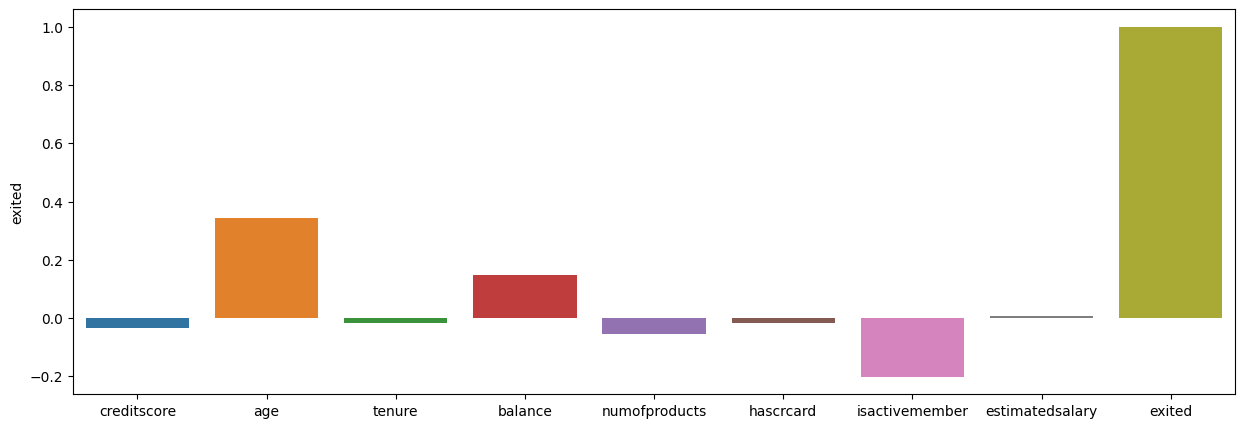

In [86]:
plt.figure(figsize=(15,5))
sns.barplot(data=churn_corr_exit,x=churn_corr_exit.index,y='exited')

In [87]:
x=churn.drop(['exited'],axis=1)
y=churn['exited']



# Dataset Splitting

In [88]:
#import train_test_split library
from sklearn.model_selection import train_test_split

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [90]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2851, 8), (1223, 8), (2851,), (1223,))

# Modeling and Evaluation

## Logistic Regression

In [91]:
#import LogisticRegression library
from sklearn.linear_model import LogisticRegression

In [119]:
lr=LogisticRegression(max_iter=1000)

In [120]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

### Evaluation of Logistic Regression without Regularization

In [121]:
lr.score(x_train,y_train)

0.663626797614872

In [122]:
lr_y_pred=lr.predict(x_test)

In [142]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay, classification_report

In [152]:
precision_score(y_test,lr_y_pred)

0.6200607902735562

In [125]:
recall_score(y_test,lr_y_pred)

0.6998284734133791

In [126]:
accuracy_score(y_test,lr_y_pred)

0.6524938675388389

In [127]:
f1_score(y_test,lr_y_pred)

0.6575342465753424

In [143]:
print("Classification Report (without Regularization):\n", classification_report(y_test, lr_y_pred))

Classification Report (without Regularization):
               precision    recall  f1-score   support

           0       0.69      0.61      0.65       640
           1       0.62      0.70      0.66       583

    accuracy                           0.65      1223
   macro avg       0.66      0.65      0.65      1223
weighted avg       0.66      0.65      0.65      1223



### Evaluation using Lasso Regularization

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Apply L1 regularization (Lasso)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train_scaled, y_train)

# Apply L2 regularization (Ridge)
model_l2 = LogisticRegression(penalty='l2', solver='liblinear')
model_l2.fit(X_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [129]:
model_l1.score(X_train_scaled, y_train)

0.6811645036829183

In [132]:
l1_y_pred=model_l1.predict(X_test_scaled)

In [134]:
precision_score(y_test,l1_y_pred)

0.680327868852459

In [135]:
recall_score(y_test,l1_y_pred)

0.7118353344768439

In [136]:
accuracy_score(y_test,l1_y_pred)

0.7031888798037612

In [137]:
f1_score(y_test,l1_y_pred)

0.6957250628667226

In [144]:
print("Classification Report (using Lasso Regularization):\n", classification_report(y_test, l1_y_pred))

Classification Report (using Lasso Regularization):
               precision    recall  f1-score   support

           0       0.73      0.70      0.71       640
           1       0.68      0.71      0.70       583

    accuracy                           0.70      1223
   macro avg       0.70      0.70      0.70      1223
weighted avg       0.70      0.70      0.70      1223



### Evaluation using Ridge Regularization

In [130]:
model_l2.score(X_train_scaled, y_train)

0.6811645036829183

In [133]:
l2_y_pred=model_l2.predict(X_test_scaled)

In [138]:
precision_score(y_test,l2_y_pred)

0.6798029556650246

In [139]:
recall_score(y_test,l2_y_pred)

0.7101200686106347

In [140]:
accuracy_score(y_test,l2_y_pred)

0.7023712183156173

In [141]:
f1_score(y_test,l2_y_pred)

0.6946308724832215

In [145]:
print("Classification Report (using Ridge):\n", classification_report(y_test, l2_y_pred))

Classification Report (using Ridge):
               precision    recall  f1-score   support

           0       0.72      0.70      0.71       640
           1       0.68      0.71      0.69       583

    accuracy                           0.70      1223
   macro avg       0.70      0.70      0.70      1223
weighted avg       0.70      0.70      0.70      1223



## Random Forest



In [146]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluation of RandomForest without tuning

In [156]:
rf.score(x_train,y_train)

1.0

In [167]:
rf_y_pred=rf.predict(x_test)

In [168]:
precision_score(y_test,rf_y_pred)

0.7403314917127072

In [169]:
recall_score(y_test,rf_y_pred)

0.6895368782161235

In [170]:
accuracy_score(y_test,rf_y_pred)

0.7367130008176614

In [171]:
f1_score(y_test,rf_y_pred)

0.7140319715808171

In [172]:
print("Classification Report:\n", classification_report(y_test, rf_y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.76       640
           1       0.74      0.69      0.71       583

    accuracy                           0.74      1223
   macro avg       0.74      0.73      0.74      1223
weighted avg       0.74      0.74      0.74      1223



### Evaluation after Hyperparameter Tuning

In [165]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_rf_model = grid_search.best_estimator_
best_rf_model.fit(x_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42)

In [166]:
best_rf_model.score(x_train,y_train)

0.8740792704314275

In [173]:
best_rf_y_pred=best_rf_model.predict(x_test)

In [174]:
precision_score(y_test,best_rf_y_pred)

0.7469026548672566

In [175]:
recall_score(y_test,best_rf_y_pred)

0.7238421955403087

In [176]:
accuracy_score(y_test,best_rf_y_pred)

0.7514309076042518

In [177]:
f1_score(y_test,best_rf_y_pred)

0.735191637630662

In [178]:
print("Classification Report(After Hyperparameter Tuning):\n", classification_report(y_test, best_rf_y_pred))

Classification Report(After Hyperparameter Tuning):
               precision    recall  f1-score   support

           0       0.76      0.78      0.77       640
           1       0.75      0.72      0.74       583

    accuracy                           0.75      1223
   macro avg       0.75      0.75      0.75      1223
weighted avg       0.75      0.75      0.75      1223

